# Supplementary material link to the dictionaries discussion in the section 3 of the paper. 

## You can run the entire notebook

## Importing libraries :

In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib
import csv
import pandas as pd
from FIF import *

## Importing Datasets :

In [2]:
os.chdir('../Datasets')

In [3]:
X_trainz = pd.read_csv('China_Train.csv', header = None)
X_train = np.array(X_trainz, dtype= float )[:,1:]
y_train = np.array(X_trainz, dtype= int )[:,0]
time = np.linspace(0,1,X_train.shape[1])

In [4]:
X_trainz2 = pd.read_csv('TwoLeadECG_Train.csv', header = None)
X_train2 = np.array(X_trainz2, dtype= float )[:,1:]
y_train2 = np.array(X_trainz2, dtype= int )[:,0]
time2 = np.linspace(0,1,X_train2.shape[1])

# The example with Chinatown dataset :

### Applying FIF with both dictionaries : Gaussian_wavelets and Dyadic_indicator.

In [5]:
np.random.seed(42)
F = FIForest(X_train, ntrees=100, time = time, subsample_size= X_train.shape[0], 
        	D= 'gaussian_wavelets', innerproduct= "auto", Dsize = 1000, alpha = 1)
S = F.compute_paths()
predict = F.predict_label(S,0.285)
F2 = FIForest(X_train, ntrees=100, time = time, subsample_size= X_train.shape[0], 
        	D= 'Dyadic_indicator', innerproduct= "auto", Dsize = 100, alpha = 1)
S2 = F2.compute_paths()
predict_2 = F2.predict_label(S2,0.28)

### Plotting the results :

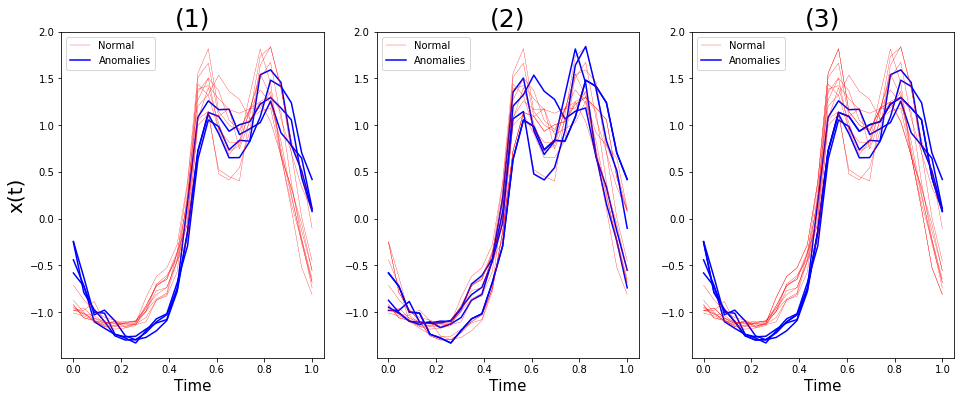

In [6]:
colors = [ matplotlib.cm.viridis_r(x)
            for x in np.linspace(0, 1, len(S)) ]
plt.figure(figsize=(16,6))
n = X_train.shape[0]
plt.subplot(131)
plt.plot(time, X_train[len(colors)-1], c ="r", linewidth = 0.3,label = 'Normal')
plt.plot(time, X_train[0], c ="b",label = 'Anomalies')
for j in range(1,len(colors)-1):
    if (y_train[j] == 1):
        plt.plot(time, X_train[j], c ="r", linewidth = 0.3)
    else:
        plt.plot(time, X_train[j], c ="b")
plt.ylabel('x(t)',size = 20)
plt.xlabel('Time',size = 15)
plt.title('(1)', size = 25)
plt.legend() 
plt.subplot(132)
plt.plot(time, X_train[0], c ="r",linewidth = 0.3,label = 'Normal')
plt.plot(time, X_train[2], c ="b", label = 'Anomalies')
for j in range(len(colors)):
    if (predict[j] == 1):
        plt.plot(time, X_train[j], c ="r", linewidth = 0.3)
    else:
        plt.plot(time, X_train[j], c ="b")
        

plt.title('(2)', size = 25)
plt.xlabel('Time',size = 15)
plt.legend() 
plt.subplot(133) 
plt.plot(time, X_train[len(colors)-1], c ="r", linewidth = 0.3,label = 'Normal')
plt.plot(time, X_train[0], c ="b",label = 'Anomalies')
for j in range(len(colors)):
    if (predict_2[j] == 1):
        plt.plot(time, X_train[j], c ="r", linewidth = 0.3)
    else:
        plt.plot(time, X_train[j], c ="b")
      

    plt.title('(3)', size = 25)
plt.xlabel('Time',size = 15)
 
    
sm = plt.cm.ScalarMappable(cmap=matplotlib.cm.viridis_r,
 
                                   norm=plt.Normalize(vmin=0, vmax=1))
plt.legend() 
sm._A = []

plt.show()

# The example with TwoLeadECG dataset :

### Applying FIF with both dictionaries : cosinus and Self_local.

In [15]:
np.random.seed(42)
F = FIForest(X_train2, ntrees=100, time=time2, subsample_size=X_train2.shape[0], 
        	D='cosinus', innerproduct="auto", Dsize = 1000, alpha = 1)
S = F.compute_paths()
predict = F.predict_label(S,0.12)
F2 = FIForest(X_train2, ntrees=100, time = time2, subsample_size= X_train2.shape[0], 
        	D='Self_local', innerproduct="auto", Dsize = 100, alpha = 1)
S2 = F2.compute_paths()
predict_2 = F2.predict_label(S2,0.12)

### Plotting the results :

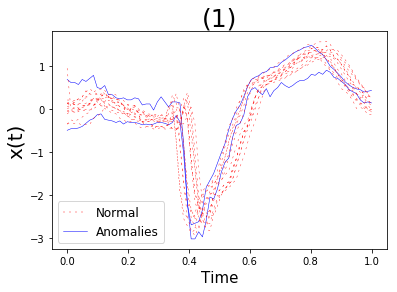

In [16]:
plt.figure(figsize=(6,4))
n = X_train2.shape[0]
# Anomalies are indexed by [0,1,2,3]
plt.plot(time2, X_train2[len(colors)-1], c ="r", linewidth=0.4,
         label='Normal',linestyle='dashed',dashes=(5, 10))

plt.plot(time2, X_train2[0], c ="b",label = 'Anomalies',linewidth=0.5)
for j in range(1,n):
    if (y_train2[j] == 1):
        plt.plot(time2, X_train2[j], c="r",linestyle='dashed', linewidth=0.4,dashes=(5, 10))
    else:
        plt.plot(time2, X_train2[j], c="b",linewidth=0.5 )
plt.ylabel('x(t)',size = 20)
plt.xlabel('Time',size = 15)
plt.title('(1)', size = 25)
plt.legend(fontsize= "large") 
plt.show()

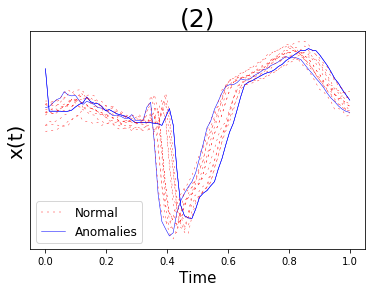

In [17]:
plt.figure(figsize=(6,4))
n = X_train2.shape[0]
plt.plot(time2, X_train2[np.argsort(S)[0]], c ="r",linewidth = 0.4,
         label = 'Normal', linestyle='dashed',dashes=(5, 10))
plt.plot(time2, X_train2[np.argsort(S)[len(S)-1]], c ="b", label = 'Anomalies',linewidth = 0.5 )
for j in range(1,len(colors)):
    if (predict[j] == 1):
        plt.plot(time2, X_train2[j], c ="r", linewidth = 0.4, linestyle='dashed',dashes=(5, 10))
    else:
        plt.plot(time2, X_train2[j], c ="b",linewidth = 0.5 )
        


plt.ylabel('x(t)',size = 20)
plt.xlabel('Time',size = 15)
plt.title('(2)', size = 25)
plt.legend(fontsize= "large") 
plt.yticks([])
plt.show()

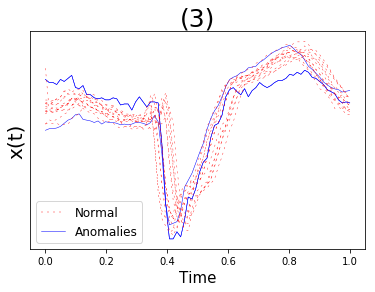

In [18]:
plt.figure(figsize=(6,4))
n = X_train2.shape[0]
plt.plot(time2, X_train2[np.argsort(S2)[0]], c ="r",linewidth = 0.4,label = 'Normal', linestyle='dashed',dashes=(5, 10))
plt.plot(time2, X_train2[np.argsort(S2)[len(S2)-1]], c ="b", label = 'Anomalies',linewidth = 0.5)
for j in range(len(S2)):
    if (predict_2[j] == 1):
        plt.plot(time2, X_train2[j], c ="r", linewidth = 0.4, linestyle='dashed',dashes=(5, 10))
    else:
        plt.plot(time2, X_train2[j], c ="b",linewidth = 0.5)
        


plt.ylabel('x(t)',size = 20)
plt.xlabel('Time',size = 15)
plt.title('(3)', size = 25)
plt.yticks([])
plt.legend(fontsize= "large") 
plt.show()